# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre las soluciónes a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [481]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random as rd 
from scipy import optimize

In [482]:
df = pd.read_json("https://github.com/restrepo/anomaly/raw/main/solutions.json.gz") #leer el json
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [483]:
mayor = df["solution"].apply(lambda x: max(list(map(abs, x)))) #crear la nueva lista, con los maximos
df["smax"] = mayor  # agregar la nueva columna
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [484]:
b = map(sum, df["solution"]) # sumar las listas
df["sum_s"] = list(b) # agregar la nueva columna
df

,l,k,solution,gcd,n,smax,sum_s
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0
...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0


In [485]:
df["sum_s³"] = df["sum_s"]**3 # elevamos al cuadrado sum_s para agregar la nueva lista
df

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [486]:
# cemilla = 1000401376
#rd.seed? para saber como funcionaba

In [487]:
rd.seed(1000401376)
numero = rd.randint(0, 390073) #numero entre 0 y 390073

In [488]:
df["solution"][numero] # ver las constantes que me tocaron

[1, -2, 4, 5, 6, 9, 14, -22, -23, -24, 32]

In [489]:
p = np.poly1d(df["solution"][numero]) # crear el polinomio
print(p)

   10     9     8     7     6     5      4      3      2
1 x  - 2 x + 4 x + 5 x + 6 x + 9 x + 14 x - 22 x - 23 x - 24 x + 32


In [490]:
roots = p.roots #crear y ver las raices
roots

array([ 1.69780369+1.97653512j,  1.69780369-1.97653512j,
        0.27505407+1.58051176j,  0.27505407-1.58051176j,
       -1.2357825 +0.58408392j, -1.2357825 -0.58408392j,
       -0.61706458+0.95343612j, -0.61706458-0.95343612j,
        1.        +0.j        ,  0.75997864+0.j        ])

In [491]:
reales = list(roots[8:]) # los numeros reales de todas las raices
reales

[(0.9999999999999996+0j), (0.7599786353674388+0j)]

In [492]:
p_1 = p.deriv() # el nuevo polinomio derivados
print(p_1)

    9      8      7      6      5      4      3      2
10 x - 18 x + 32 x + 35 x + 36 x + 45 x + 56 x - 66 x - 46 x - 24


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


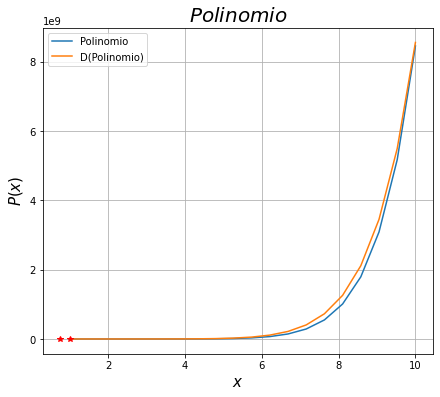

In [493]:
x = np.linspace(1, 10, 20)
plt.figure(figsize=(7, 6))
plt.plot(x, p(x), label = "Polinomio")
plt.plot(x, p_1(x), label = "D(Polinomio)")
plt.legend()
plt.plot(reales[0], p(1), "r*") #Raiz solucion 
plt.plot(reales[1], p(0.7599786353674388), "r*") # Raiz solucion
plt.title("$Polinomio$", size=20)
plt.xlabel("$x$", size=15)
plt.ylabel("$P(x)$", size=15)
plt.grid()
# grafica del polinomio y el polinomio derivado, con sus raices

In [494]:
rd.seed(1000401376)
numero_1 = rd.randint(1, 5)
numero_1
# Escogo la ecuacion 5) cos(x)/x = -p

5

In [495]:
def f(y, P_ = rd.random()): #p_ es el numero entre 0 y 1 y creo la funcion para hacer las raices y graficar la
  return np.cos(y)/y + p_

y = np.linspace(-10, 10, 100)


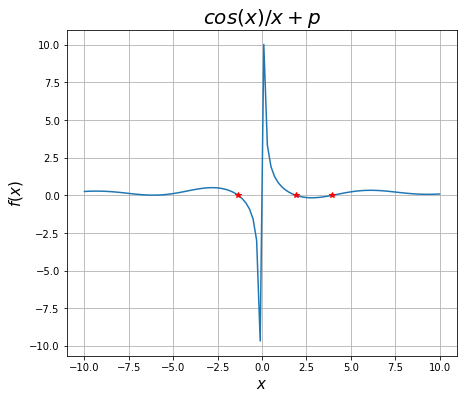

In [496]:
plt.figure(figsize=(7, 6))
plt.plot(y, f(y),)
plt.plot(-1.3379952556406352, f(-1.3379952556406352), "r*")
plt.plot(1.9055863681626306, f(1.9055863681626306), "r*")
plt.plot(3.960644176278265, f(3.960644176278265), "r*")
plt.title("$cos(x)/x + p$", size=20)
plt.xlabel("$x$", size=15)
plt.ylabel("$f(x)$", size=15)
plt.grid()

In [497]:
raiz_1 = optimize.bisect(f, -2, -1) # -1.3379952556406352
raiz_2 = optimize.bisect(f, 0, 2.5) # 1.9055863681626306
raiz_3 = optimize.bisect(f, 2.5, 5) # 3.960644176278265

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
